In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
df.shape

(5572, 5)

In [4]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Web-app
# 8. Deploy

## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.sample(5)

,v1,v2
532,ham,Gudnite....tc...practice going on
3838,ham,Erm Û_ ill pick you up at about 6.45pm. That'...
307,ham,Lol yes. Our friendship is hanging on a thread...
2820,ham,Oh god..taken the teeth?is it paining
1483,ham,Purity of friendship between two is not about ...


In [7]:
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
df.sample(5)

,target,text
4560,ham,Good afternoon my boytoy. How goes that walkin...
3118,ham,Stop knowing me so well!
5355,ham,Living is very simple.. Loving is also simple....
5079,ham,\Keep ur problems in ur heart
4584,spam,U have a Secret Admirer who is looking 2 make ...


In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [10]:
df["target"] = encode.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(subset="text")

In [14]:
df.duplicated().sum()

0

## EDA

In [15]:
import matplotlib.pyplot as plt
sizes = df["target"].value_counts().values.tolist()

([<matplotlib.patches.Wedge at 0x14e13b631c0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

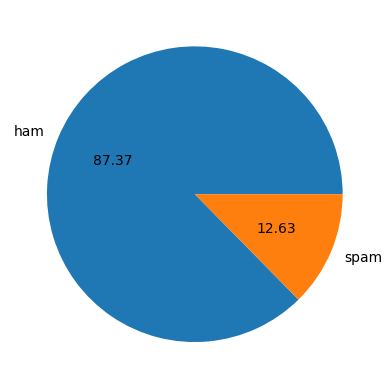

In [16]:
plt.pie(sizes, labels=["ham", "spam"], autopct='%0.2f')

In [17]:
# Takeaway: Data is imbalanced

In [18]:
df["text"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [19]:
df["num_characters"] = df['text'].str.len().values.tolist()
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [22]:
df['num_sents'] = df['text'].apply(lambda x: len(sent_tokenize(x)))
df

,target,text,num_characters,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [23]:
df[["num_characters","num_words", "num_sents"]].describe()

,num_characters,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# Spam
df[df["target"] == 1][["num_characters","num_words", "num_sents"]].describe()

,num_characters,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
# ham
df[df["target"] == 0][["num_characters","num_words", "num_sents"]].describe()

,num_characters,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
import seaborn as sns

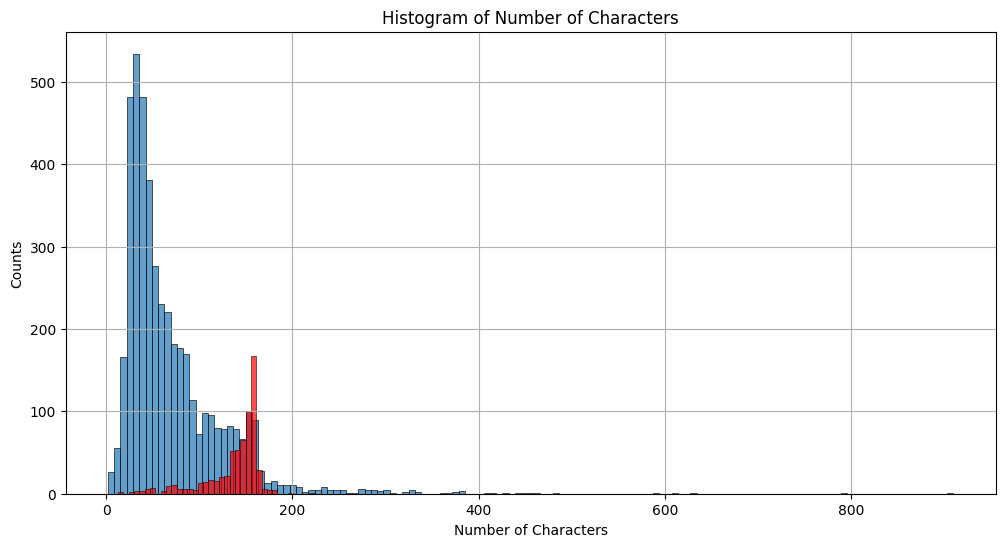

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df["target"] == 0], x="num_characters", edgecolor='black', alpha=0.7)
sns.histplot(data=df[df["target"] == 1], x="num_characters", edgecolor='black', alpha=0.7, color="red")
plt.xlabel('Number of Characters')
plt.ylabel('Counts')
plt.title('Histogram of Number of Characters')
plt.grid(True)
plt.show()

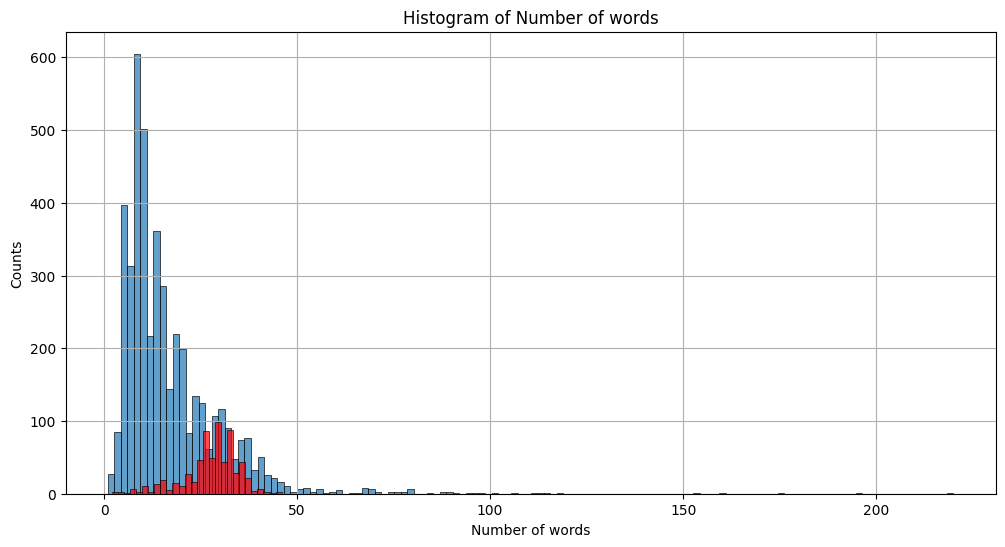

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df["target"] == 0], x="num_words", edgecolor='black', alpha=0.7)
sns.histplot(data=df[df["target"] == 1], x="num_words", edgecolor='black', alpha=0.7, color="red")
plt.xlabel('Number of words')
plt.ylabel('Counts')
plt.title('Histogram of Number of words')
plt.grid(True)
plt.show()

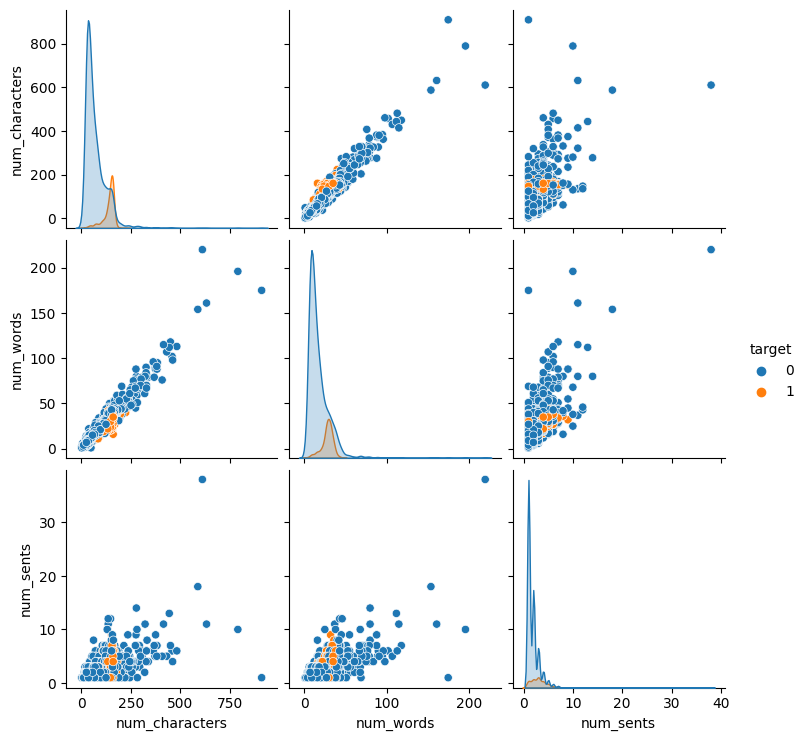

In [29]:
sns.pairplot(df, hue="target")

In [30]:
df.corr()

,target,num_characters,num_words,num_sents
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sents,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

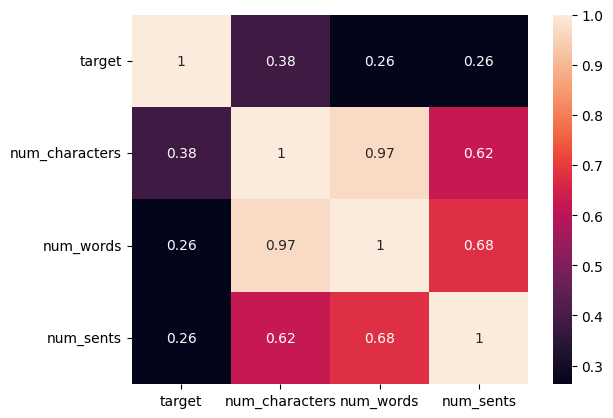

In [31]:
sns.heatmap(df.corr(), annot=True)

In [32]:
# We've got some outliers

## Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import string  
punc = string.punctuation  

In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [36]:
def text_transform(text):
    text = text.lower()
    text = word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words and i not in punc:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [37]:
text_transform("HI HOW ARE YOU? I am mahdi. The king in the north. Oh, I am loving this. ")

'hi mahdi king north oh love'

In [38]:
df["transformed_text"] = df["text"].apply(text_transform)

In [39]:
df

,target,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [41]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

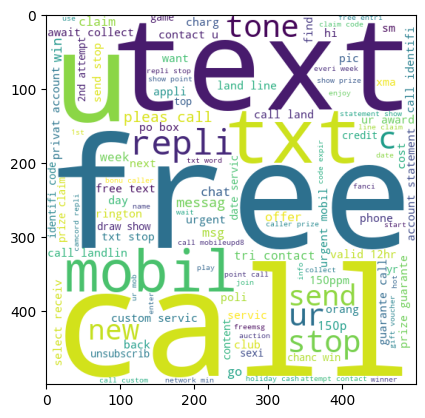

In [42]:
plt.imshow(spam_wc)

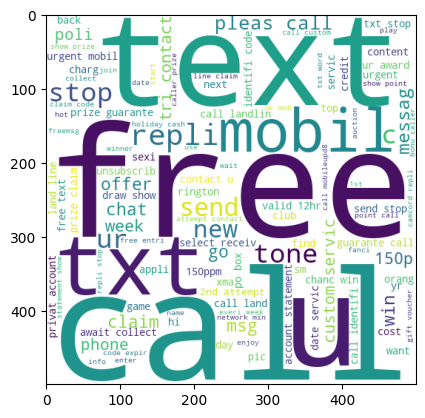

In [43]:
ham_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [44]:
from collections import Counter

In [45]:
spam_corpus = " ".join(df[df["target"] == 1]["transformed_text"].tolist()).split()
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).items(), columns=["Word", "Count"])

In [46]:
spam_corpus_df

,Word,Count
0,free,191
1,entri,21
2,2,155
3,wkli,9
4,comp,8
...,...,...
2217,shit,1
2218,bailiff,1
2219,hous,1
2220,087187272008,1


In [47]:
spam_corpus_df = spam_corpus_df.sort_values(by="Count", ascending=False)
spam_corpus_df

,Word,Count
47,call,320
0,free,191
2,2,155
17,txt,141
12,text,122
...,...,...
1285,09090900040,1
171,ls1,1
1282,09061743811,1
172,3aj,1


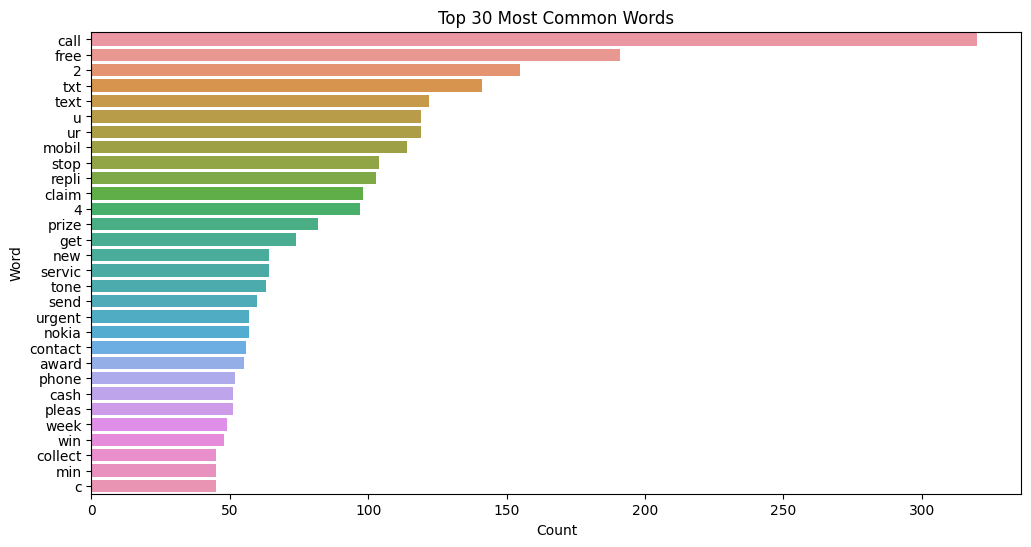

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Word", data=spam_corpus_df.head(30))
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words')
plt.show()

In [49]:
ham_corpus = " ".join(df[df["target"] == 0]["transformed_text"].tolist()).split()
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).items(), columns=["Word", "Count"])
ham_corpus_df = ham_corpus_df.sort_values(by="Count", ascending=False)

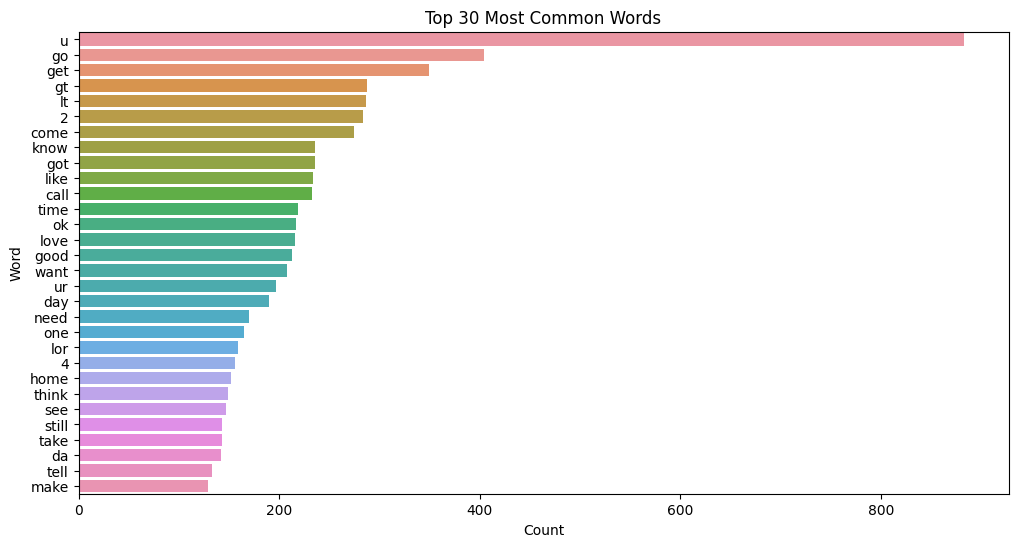

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Word", data=ham_corpus_df.head(30))
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words')
plt.show()

## Model building

In [93]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [118]:
tv = TfidfVectorizer(max_features=3000)
X = tv.fit_transform(df["transformed_text"])

In [119]:
y = df["target"].values

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [122]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

    # Add annotations to the plot
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")

    # Add TP, TN, FP, FN text to the plot
    plt.text(0.5, 0.25, "TN = {}".format(cm[0, 0]), ha="center", va="center", color="red")
    plt.text(1.5, 0.25, "FP = {}".format(cm[0, 1]), ha="center", va="center", color="red")
    plt.text(0.5, 1.25, "FN = {}".format(cm[1, 0]), ha="center", va="center", color="red")
    plt.text(1.5, 1.25, "TP = {}".format(cm[1, 1]), ha="center", va="center", color="red")

    plt.show()

In [123]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [124]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

0.8607350096711799
0.5020746887966805
[[769 120]
 [ 24 121]]


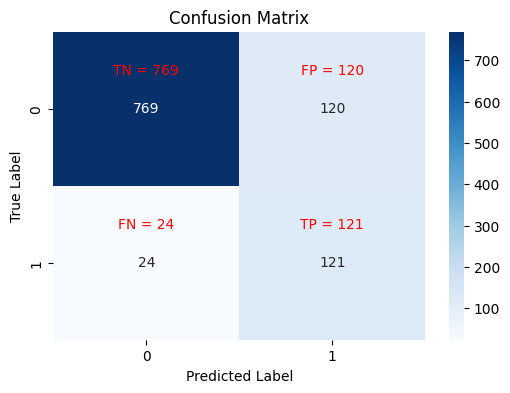

In [125]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_gnb))

0.9729206963249516
0.9915966386554622
[[888   1]
 [ 27 118]]


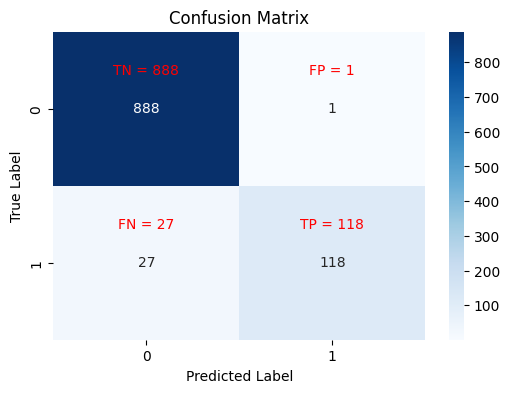

In [126]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_mnb))

0.9729206963249516
0.9606299212598425
[[884   5]
 [ 23 122]]


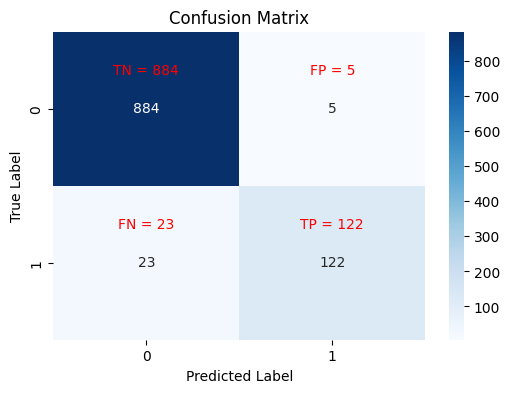

In [127]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_bnb))

In [128]:
# TfidfVectorizer ----> MultinomialNB

##### Merge two datasets to compare

In [164]:
df_algorithms = pd.read_csv("classifier_results.csv")
df_algorithms_3000 = pd.read_csv("classifier_results_3000.csv")

In [165]:
df_algorithms

,Classifier,Precision,Accuracy
0,Naive Bayes,0.990654,0.961315
1,Logistic Regression,0.942308,0.948743
2,Support Vector Machine,0.991228,0.968085
3,Random Forest,0.991150,0.967118
4,K-Nearest Neighbors,1.000000,0.896518


In [166]:
df_algorithms_3000

,Classifier_3000,Precision_3000,Accuracy_3000
0,Naive Bayes,0.991597,0.972921
1,Logistic Regression,0.947368,0.958414
2,Support Vector Machine,0.991736,0.974855
3,Random Forest,0.991736,0.974855
4,K-Nearest Neighbors,1.000000,0.904255


In [167]:
df_algorithms_3000.rename(columns={"Classifier_3000": "Classifier"}, inplace=True)

In [168]:
merged_df_algorithms = pd.merge(df_algorithms, df_algorithms_3000)

In [169]:
merged_df_algorithms.sort_values("Precision")

,Classifier,Precision,Accuracy,Precision_3000,Accuracy_3000
1,Logistic Regression,0.942308,0.948743,0.947368,0.958414
0,Naive Bayes,0.990654,0.961315,0.991597,0.972921
3,Random Forest,0.991150,0.967118,0.991736,0.974855
2,Support Vector Machine,0.991228,0.968085,0.991736,0.974855
4,K-Nearest Neighbors,1.000000,0.896518,1.000000,0.904255


##### TfidfVectorizer ----> SVM

In [170]:
from sklearn.svm import SVC

In [171]:
model = SVC()

In [172]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0.9748549323017408
0.9917355371900827
[[888   1]
 [ 25 120]]


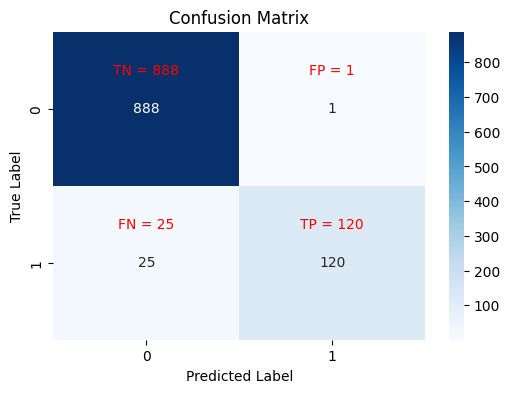

In [173]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [174]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale']
}

# Create SVC model
svc_model = SVC()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(svc_model, param_grid, scoring='precision', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_svc_model = grid_search.best_estimator_

# Train and test the model
best_svc_model.fit(X_train, y_train)
y_pred = best_svc_model.predict(X_test)

# Calculate precision score
precision = precision_score(y_test, y_pred) 
print("Precision:", precision)


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-pack

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-pack

Precision: 1.0


0.925531914893617
1.0
[[889   0]
 [ 77  68]]


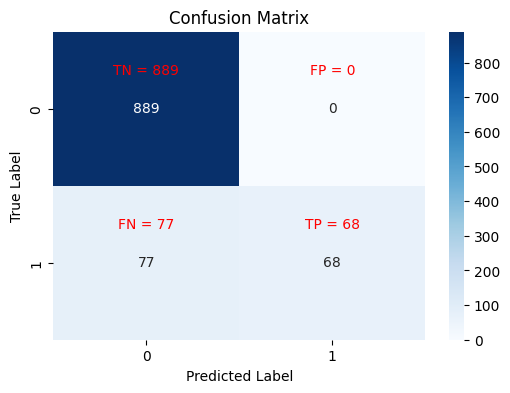

In [175]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

### Saving the model

In [176]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_svc_model, file)
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tv, file)

In [182]:
df[df["target"] == 1]["text"].values.tolist()

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
 'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
 'XXXMobileMovieClub: To use your credit, click the WAP link in